# Project Name: Demand Prediction (Busy Ratio Forecasting) of Doordash
# Method: CRISP-DM
# Author: A B M Ahsan

Data Preparation

In [2]:
import pandas as pd

df = pd.read_csv(r'G:\My Drive\DoorDash ML Model_Self Project\preprocessed_doordash.csv')

df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,promo_item,promo_order,total_onshift_dashers_log,total_busy_dashers_log,total_outstanding_orders_log,...,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,SMA,EMA,SMA_diff,EMA_diff,market_id_encoded,delivery_time_diff
0,2,1058,2,219,799,0,0,1.0,1.0,1.0,...,0,0,0,0,0.283333,0.500000,-0.283333,0.000000,0,3340.0
1,2,690,2,195,255,0,0,1.0,0.0,1.0,...,0,0,0,0,0.283333,0.409091,-0.283333,-0.409091,2,2683.0
2,3,1867,3,449,529,0,0,2.0,1.0,1.0,...,1,0,0,0,0.283333,0.380165,-0.283333,-0.130165,0,1135.0
3,3,955,3,245,345,0,0,1.0,1.0,1.0,...,0,0,0,0,0.283333,0.432256,-0.283333,0.234410,0,2515.0
4,3,825,1,125,125,0,0,0.0,0.0,0.0,...,0,0,0,0,0.283333,0.353664,-0.283333,-0.353664,0,3221.0


Feature Selection

In [3]:
from sklearn.model_selection import train_test_split

# Drop 'busy_ratio' target variable
X = df.drop(columns=['busy_ratio'])  # Dropping the target variable from features
y = df['busy_ratio']  # Target variable (busy_ratio)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=30 
)

# Print the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(138194, 91) (59226, 91) (138194,) (59226,)


In [4]:
print(df.columns)


Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'promo_item', 'promo_order',
       'total_onshift_dashers_log', 'total_busy_dashers_log',
       'total_outstanding_orders_log', 'busy_ratio',
       'store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol',
       'store_primary_category_alcohol-plus-food',
       'store_primary_category_american', 'store_primary_category_argentine',
       'store_primary_category_asian', 'store_primary_category_barbecue',
       'store_primary_category_belgian', 'store_primary_category_brazilian',
       'store_primary_category_breakfast', 'store_primary_category_british',
       'store_primary_category_bubble-tea', 'store_primary_category_burger',
       'store_primary_category_burmese', 'store_primary_category_cafe',
       'store_primary_category_cajun', 'store_primary_category_caribbean',
       'store_primary_category_catering', 'store_primary_cate

In [5]:
df.dtypes

total_items             int64
subtotal                int64
num_distinct_items      int64
min_item_price          int64
max_item_price          int64
                       ...   
EMA                   float64
SMA_diff              float64
EMA_diff              float64
market_id_encoded       int64
delivery_time_diff    float64
Length: 92, dtype: object

In [6]:
# Identify columns with mixed data types
for col in X.columns:
    if not all(isinstance(val, (int, float)) or pd.isnull(val) for val in X[col]):
        print(f"Column {col} contains non-numeric data.")


In [7]:
# Check for null values
print(X.isnull().sum())


total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 91, dtype: int64


In [8]:
# Full information on the DataFrame
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197420 entries, 0 to 197419
Data columns (total 91 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   total_items                               197420 non-null  int64  
 1   subtotal                                  197420 non-null  int64  
 2   num_distinct_items                        197420 non-null  int64  
 3   min_item_price                            197420 non-null  int64  
 4   max_item_price                            197420 non-null  int64  
 5   promo_item                                197420 non-null  int64  
 6   promo_order                               197420 non-null  int64  
 7   total_onshift_dashers_log                 197420 non-null  float64
 8   total_busy_dashers_log                    197420 non-null  float64
 9   total_outstanding_orders_log              197420 non-null  float64
 10  store_primary_catego

In [9]:
# Inspect unique values in a column
print(X['delivery_time_diff'].unique())


[3340. 2683. 1135. ... 8742.  893. 6728.]


In [10]:
X['delivery_time_diff'] = pd.to_numeric(X['delivery_time_diff'], errors='coerce')  # Converts invalid data to NaN


In [11]:
# Check for infinity or NaN values
print(X.isin([float('inf'), -float('inf')]).sum())  # Count occurrences of infinity
print(X.isnull().sum())  # Check for NaN values


total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 91, dtype: int64
total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 91, dtype: int64


In [12]:
X['delivery_time_diff'] = pd.to_numeric(X['delivery_time_diff'], errors='coerce')  # Convert any invalid entries to NaN
X['EMA_diff'] = pd.to_numeric(X['EMA_diff'], errors='coerce')  # Same for other columns


In [13]:
# Check for NaN or infinity values in the features
import numpy as np

# Check for NaN values
print("NaN values in each column:")
print(X.isna().sum())

# Check for infinite values
print("\nInfinite values in each column:")
print(np.isinf(X).sum())


NaN values in each column:
total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 91, dtype: int64

Infinite values in each column:
total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 91, dtype: int64


In [14]:
# Replace infinity with a large value or drop rows
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.median())


In [15]:
# Scale the data again
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Embedded Feature Slection

In [16]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

# Assuming you have already prepared X (features) and y (target) variables
# Ensure there are no missing values or infinite values in the dataset
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

# Fit Lasso model
lasso = Lasso(alpha=0.01)  # You can adjust alpha (regularization strength)
lasso.fit(X_clean, y)

# Get the coefficients and feature names
coefficients = pd.Series(lasso.coef_, index=X_clean.columns)

# Sort features by the absolute value of the coefficients
top_10_features = coefficients.abs().sort_values(ascending=False).head(10)

# Display the top 10 important features
print("Top 10 important features selected by Lasso:")
print(top_10_features)


Top 10 important features selected by Lasso:
SMA                                      8.151053e-01
SMA_diff                                 7.110108e-01
EMA_diff                                 1.961576e-01
total_busy_dashers_log                   2.686298e-03
EMA                                      1.848077e-06
delivery_time_diff                       7.165517e-07
subtotal                                 4.763620e-07
max_item_price                           4.110820e-07
min_item_price                           1.464720e-07
store_primary_category_middle-eastern    0.000000e+00
dtype: float64


In [17]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestRegressor for regression problems
import pandas as pd
import numpy as np

# Ensure there are no missing values or infinite values in the dataset
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

# Fit Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_clean, y)

# Get the feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_clean.columns)

# Sort features by importance and get the top 10
top_10_features_rf = feature_importances.sort_values(ascending=False).head(10)

# Display the top 10 important features
print("Top 10 important features selected by Random Forest:")
print(top_10_features_rf)


Top 10 important features selected by Random Forest:
EMA_diff                     0.685241
EMA                          0.215324
total_busy_dashers_log       0.059032
SMA_diff                     0.033410
SMA                          0.003699
total_onshift_dashers_log    0.000579
delivery_time_diff           0.000529
subtotal                     0.000520
max_item_price               0.000353
min_item_price               0.000270
dtype: float64


In [18]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

# Ensure there are no missing values or infinite values in the dataset
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

# Fit Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)  # You can adjust other hyperparameters like max_depth, min_samples_split
dt.fit(X_clean, y)

# Get the feature importances
feature_importances_dt = pd.Series(dt.feature_importances_, index=X_clean.columns)

# Sort features by importance and get the top 10
top_10_features_dt = feature_importances_dt.sort_values(ascending=False).head(10)

# Display the top 10 important features
print("Top 10 important features selected by Decision Tree:")
print(top_10_features_dt)


Top 10 important features selected by Decision Tree:
EMA_diff                        0.693538
EMA                             0.231009
total_busy_dashers_log          0.059986
SMA_diff                        0.010559
SMA                             0.003387
subtotal                        0.000458
delivery_time_diff              0.000403
total_outstanding_orders_log    0.000105
num_distinct_items              0.000091
min_item_price                  0.000078
dtype: float64


In [19]:
import xgboost as xgb
import pandas as pd
import numpy as np

# Assuming you have already prepared X (features) and y (target) variables
# Ensure there are no missing values or infinite values in the dataset
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

# Fit XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)  # You can adjust hyperparameters like n_estimators, learning_rate
xgb_model.fit(X_clean, y)

# Get the feature importances
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_clean.columns)

# Sort features by importance and get the top 10
top_10_features_xgb = feature_importances_xgb.sort_values(ascending=False).head(10)

# Display the top 10 important features
print("Top 10 important features selected by XGBoost:")
print(top_10_features_xgb)


Top 10 important features selected by XGBoost:
EMA_diff                          0.153107
total_busy_dashers_log            0.150145
total_onshift_dashers_log         0.136432
SMA                               0.086176
store_primary_category_italian    0.080013
EMA                               0.077676
SMA_diff                          0.058245
max_item_price                    0.020973
market_id_encoded                 0.020363
delivery_time_diff                0.019915
dtype: float32


In [20]:
# Checking the result for similairty

from collections import Counter

# Top 10 features from each method
lasso_features = [
    'SMA', 'SMA_diff', 'EMA_diff', 'total_busy_dashers_log', 'EMA', 
    'delivery_time_diff', 'subtotal', 'max_item_price', 'min_item_price', 
    'store_primary_category_middle-eastern'
]

random_forest_features = [
    'EMA_diff', 'EMA', 'total_busy_dashers_log', 'SMA_diff', 'SMA', 
    'total_onshift_dashers_log', 'delivery_time_diff', 'subtotal', 
    'max_item_price', 'min_item_price'
]

decision_tree_features = [
    'EMA_diff', 'EMA', 'total_busy_dashers_log', 'SMA_diff', 'SMA', 
    'subtotal', 'delivery_time_diff', 'total_outstanding_orders_log', 
    'num_distinct_items', 'min_item_price'
]

xgboost_features = [
    'EMA_diff', 'total_busy_dashers_log', 'total_onshift_dashers_log', 
    'SMA', 'store_primary_category_italian', 'EMA', 'SMA_diff', 
    'max_item_price', 'market_id_encoded', 'delivery_time_diff'
]

# Combine all features into a single list
all_features = lasso_features + random_forest_features + decision_tree_features + xgboost_features

# Count the occurrence of each feature
feature_counts = Counter(all_features)

# Sort features by occurrence
most_common_features = feature_counts.most_common()

# Print the most common features
print("Feature occurrence across all methods:")
for feature, count in most_common_features:
    print(f"{feature}: {count} times")

# If you want to get the top N most common features
N = 10
top_n_features = most_common_features[:N]

print("\nTop 10 most common features:")
for feature, count in top_n_features:
    print(f"{feature}: {count} times")


Feature occurrence across all methods:
SMA: 4 times
SMA_diff: 4 times
EMA_diff: 4 times
total_busy_dashers_log: 4 times
EMA: 4 times
delivery_time_diff: 4 times
subtotal: 3 times
max_item_price: 3 times
min_item_price: 3 times
total_onshift_dashers_log: 2 times
store_primary_category_middle-eastern: 1 times
total_outstanding_orders_log: 1 times
num_distinct_items: 1 times
store_primary_category_italian: 1 times
market_id_encoded: 1 times

Top 10 most common features:
SMA: 4 times
SMA_diff: 4 times
EMA_diff: 4 times
total_busy_dashers_log: 4 times
EMA: 4 times
delivery_time_diff: 4 times
subtotal: 3 times
max_item_price: 3 times
min_item_price: 3 times
total_onshift_dashers_log: 2 times


Coss-Validation

In [21]:
# 5 fold

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import numpy as np


# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics
mse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_clean):
    X_train, X_test = X_clean.iloc[train_index], X_clean.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Lasso model (you can use any model you want)
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = lasso.predict(X_test)
    
    # Calculate performance metrics (e.g., MSE, R2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate and print average performance metrics across folds
print(f"Average MSE across 5 folds: {np.mean(mse_list):.4f}")
print(f"Average R2 across 5 folds: {np.mean(r2_list):.4f}")


Average MSE across 5 folds: 0.0028
Average R2 across 5 folds: 0.9827


In [22]:
# 5 fold 

from sklearn.model_selection import cross_val_score  # Import cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Use Random Forest Regressor for continuous target values
import numpy as np

# Initialize the model (Random Forest Regressor)
model_5 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=30)  # Parallel processing enabled

# Perform 5-fold cross-validation with parallel processing
scores = cross_val_score(model_5, X, y, cv=5, n_jobs=-1)  # 5-fold cross-validation using all CPU cores

# Show output of cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the average score across all folds
print(f"Average cross-validation score: {np.mean(scores):.4f}")


Cross-validation scores: [0.93474657 0.99883469 0.99717459 0.99887839 0.99403058]
Average cross-validation score: 0.9847


In [23]:
# 10 fold

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import numpy as np

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics
mse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_clean):
    X_train, X_test = X_clean.iloc[train_index], X_clean.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Lasso model (you can use any model you want)
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = lasso.predict(X_test)
    
    # Calculate performance metrics (e.g., MSE, R2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics
    mse_list.append(mse)
    r2_list.append(r2)

# Calculate and print average performance metrics across folds
print(f"Average MSE across 10 folds: {np.mean(mse_list):.4f}")
print(f"Average R2 across 10 folds: {np.mean(r2_list):.4f}")


Average MSE across 10 folds: 0.0028
Average R2 across 10 folds: 0.9827


In [24]:
# 10 fold 

from sklearn.model_selection import cross_val_score  # Import cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Use Random Forest Regressor for continuous target values
import numpy as np

# Initialize the model (Random Forest Regressor)
model_10 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=30)  # Parallel processing enabled

# Perform 10-fold cross-validation with parallel processing
scores = cross_val_score(model_10, X, y, cv=10, n_jobs=-1)  # 10-fold cross-validation using all CPU cores

# Show output of cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the average score across all folds
print(f"Average cross-validation score: {np.mean(scores):.4f}")


Cross-validation scores: [0.99950857 0.92546134 0.99933003 0.99831636 0.99407981 0.99989747
 0.99867024 0.99901226 0.99362433 0.99756869]
Average cross-validation score: 0.9905


In [25]:
# Compare Training vs. Cross-Validation Performance

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=30)

# Train on the entire training set
model.fit(X_train, y_train)

# Predict on the training data and calculate performance metrics
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculate average cross-validation MSE (convert to positive)
cv_mse = -np.mean(cv_scores)

# Display training vs cross-validation performance
print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Cross-validation MSE: {cv_mse:.4f}")


Training MSE: 0.0002, Training R²: 0.9990
Cross-validation MSE: 0.0065


In [26]:
# Holdout Test Set

# Evaluate on test data
y_test_pred = model.predict(X_test)

# Calculate performance metrics on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display test performance
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

# Compare training/cross-validation performance to test set
if train_r2 > test_r2:
    print("Possible overfitting: Training R² is higher than Test R².")
else:
    print("Model is generalizing well to the test set.")


Test MSE: 0.0011, Test R²: 0.9927
Possible overfitting: Training R² is higher than Test R².


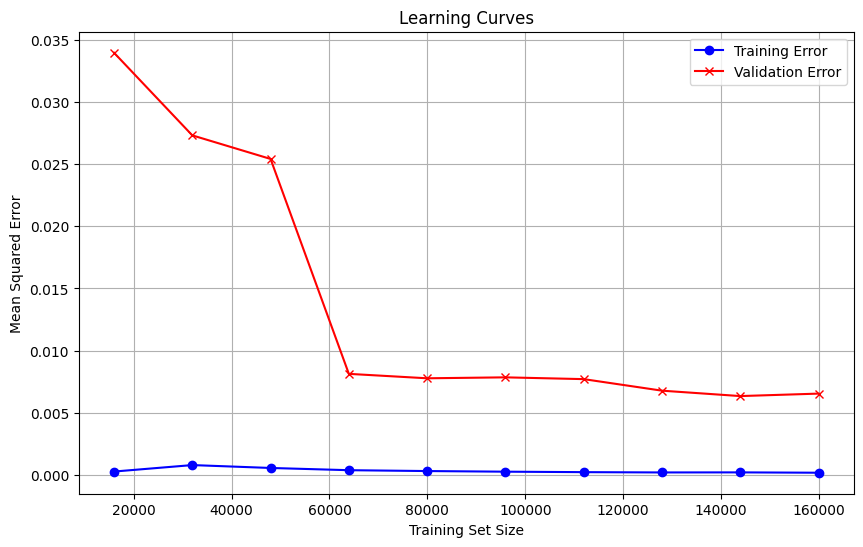

In [27]:
# Plot Learning Curves (Training vs. Validation Errors)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves (train_sizes vs. score)
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive for easier interpretation
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', linestyle='-', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', color='red', linestyle='-', marker='x')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Regularized Random Forest
model_reg = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,  # Minimum samples per leaf
    max_features='sqrt',  # Consider sqrt(number of features) for splits
    random_state=30,
    n_jobs=-1
)

# Cross-validation to check generalization
scores = cross_val_score(model_reg, X, y, cv=10, scoring='r2')
print("Cross-validation R² scores:", scores)
print(f"Average cross-validation R²: {np.mean(scores):.4f}")


Cross-validation R² scores: [0.78207274 0.58286842 0.81434393 0.83226349 0.85344443 0.77473714
 0.8005135  0.81493847 0.86715504 0.84101057]
Average cross-validation R²: 0.7963


In [40]:
# Fit the model
model_reg.fit(X, y)

# Feature importance
importances = model_reg.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Print top features
for i in sorted_indices[:10]:  # Adjust range as needed
    print(f"Feature: {feature_names[i]}, Importance: {importances[i]:.4f}")


Feature: EMA_diff, Importance: 0.3055
Feature: SMA_diff, Importance: 0.2402
Feature: EMA, Importance: 0.1483
Feature: SMA, Importance: 0.1087
Feature: total_busy_dashers_log, Importance: 0.0787
Feature: total_onshift_dashers_log, Importance: 0.0519
Feature: total_outstanding_orders_log, Importance: 0.0415
Feature: market_id_encoded, Importance: 0.0081
Feature: delivery_time_diff, Importance: 0.0046
Feature: max_item_price, Importance: 0.0027


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define the cross-validation method for regression
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(model_reg, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"Cross-validation R²: {np.mean(scores):.4f}")


Cross-validation R²: 0.8503


In [42]:
import pandas as pd

# List of unimportant features based on feature importance
unimportant_features = [
    'total_outstanding_orders_log', 
    'market_id_encoded', 
    'delivery_time_diff', 
    'max_item_price'
]

# Drop unimportant features from the DataFrame
df_cleaned = df.drop(columns=unimportant_features)

# Save the updated dataset as a CSV (or any preferred format)
df_cleaned.to_csv('cleaned_training_dataset.csv', index=False)

# Optionally, if you're working in Jupyter, you can inspect the cleaned dataset
df_cleaned.head()


,total_items,subtotal,num_distinct_items,min_item_price,promo_item,promo_order,total_onshift_dashers_log,total_busy_dashers_log,busy_ratio,store_primary_category_afghan,...,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,SMA,EMA,SMA_diff,EMA_diff
0,2,1058,2,219,0,0,1.0,1.0,0.500000,0,...,0,0,0,0,0,0,0.283333,0.500000,-0.283333,0.000000
1,2,690,2,195,0,0,1.0,0.0,0.000000,0,...,0,0,0,0,0,0,0.283333,0.409091,-0.283333,-0.409091
2,3,1867,3,449,0,0,2.0,1.0,0.250000,0,...,0,0,1,0,0,0,0.283333,0.380165,-0.283333,-0.130165
3,3,955,3,245,0,0,1.0,1.0,0.666667,0,...,0,0,0,0,0,0,0.283333,0.432256,-0.283333,0.234410
4,3,825,1,125,0,0,0.0,0.0,0.000000,0,...,0,0,0,0,0,0,0.283333,0.353664,-0.283333,-0.353664


In [43]:
df_cleaned.shape

(197420, 88)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training, 15% validation, and 15% test sets
train_data, temp_data = train_test_split(df_cleaned, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the validation and test sets
train_data.to_csv('train_data.csv', index=False)
valid_data.to_csv('valid_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Check the split proportions
print(f"Training Data: {len(train_data)} records")
print(f"Validation Data: {len(valid_data)} records")
print(f"Test Data: {len(test_data)} records")


Training Data: 138194 records
Validation Data: 29613 records
Test Data: 29613 records
